In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"Global YouTube Statistics.csv", encoding='windows-1254')

In [3]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
df.shape

(995, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

# columns and row delete

<Axes: >

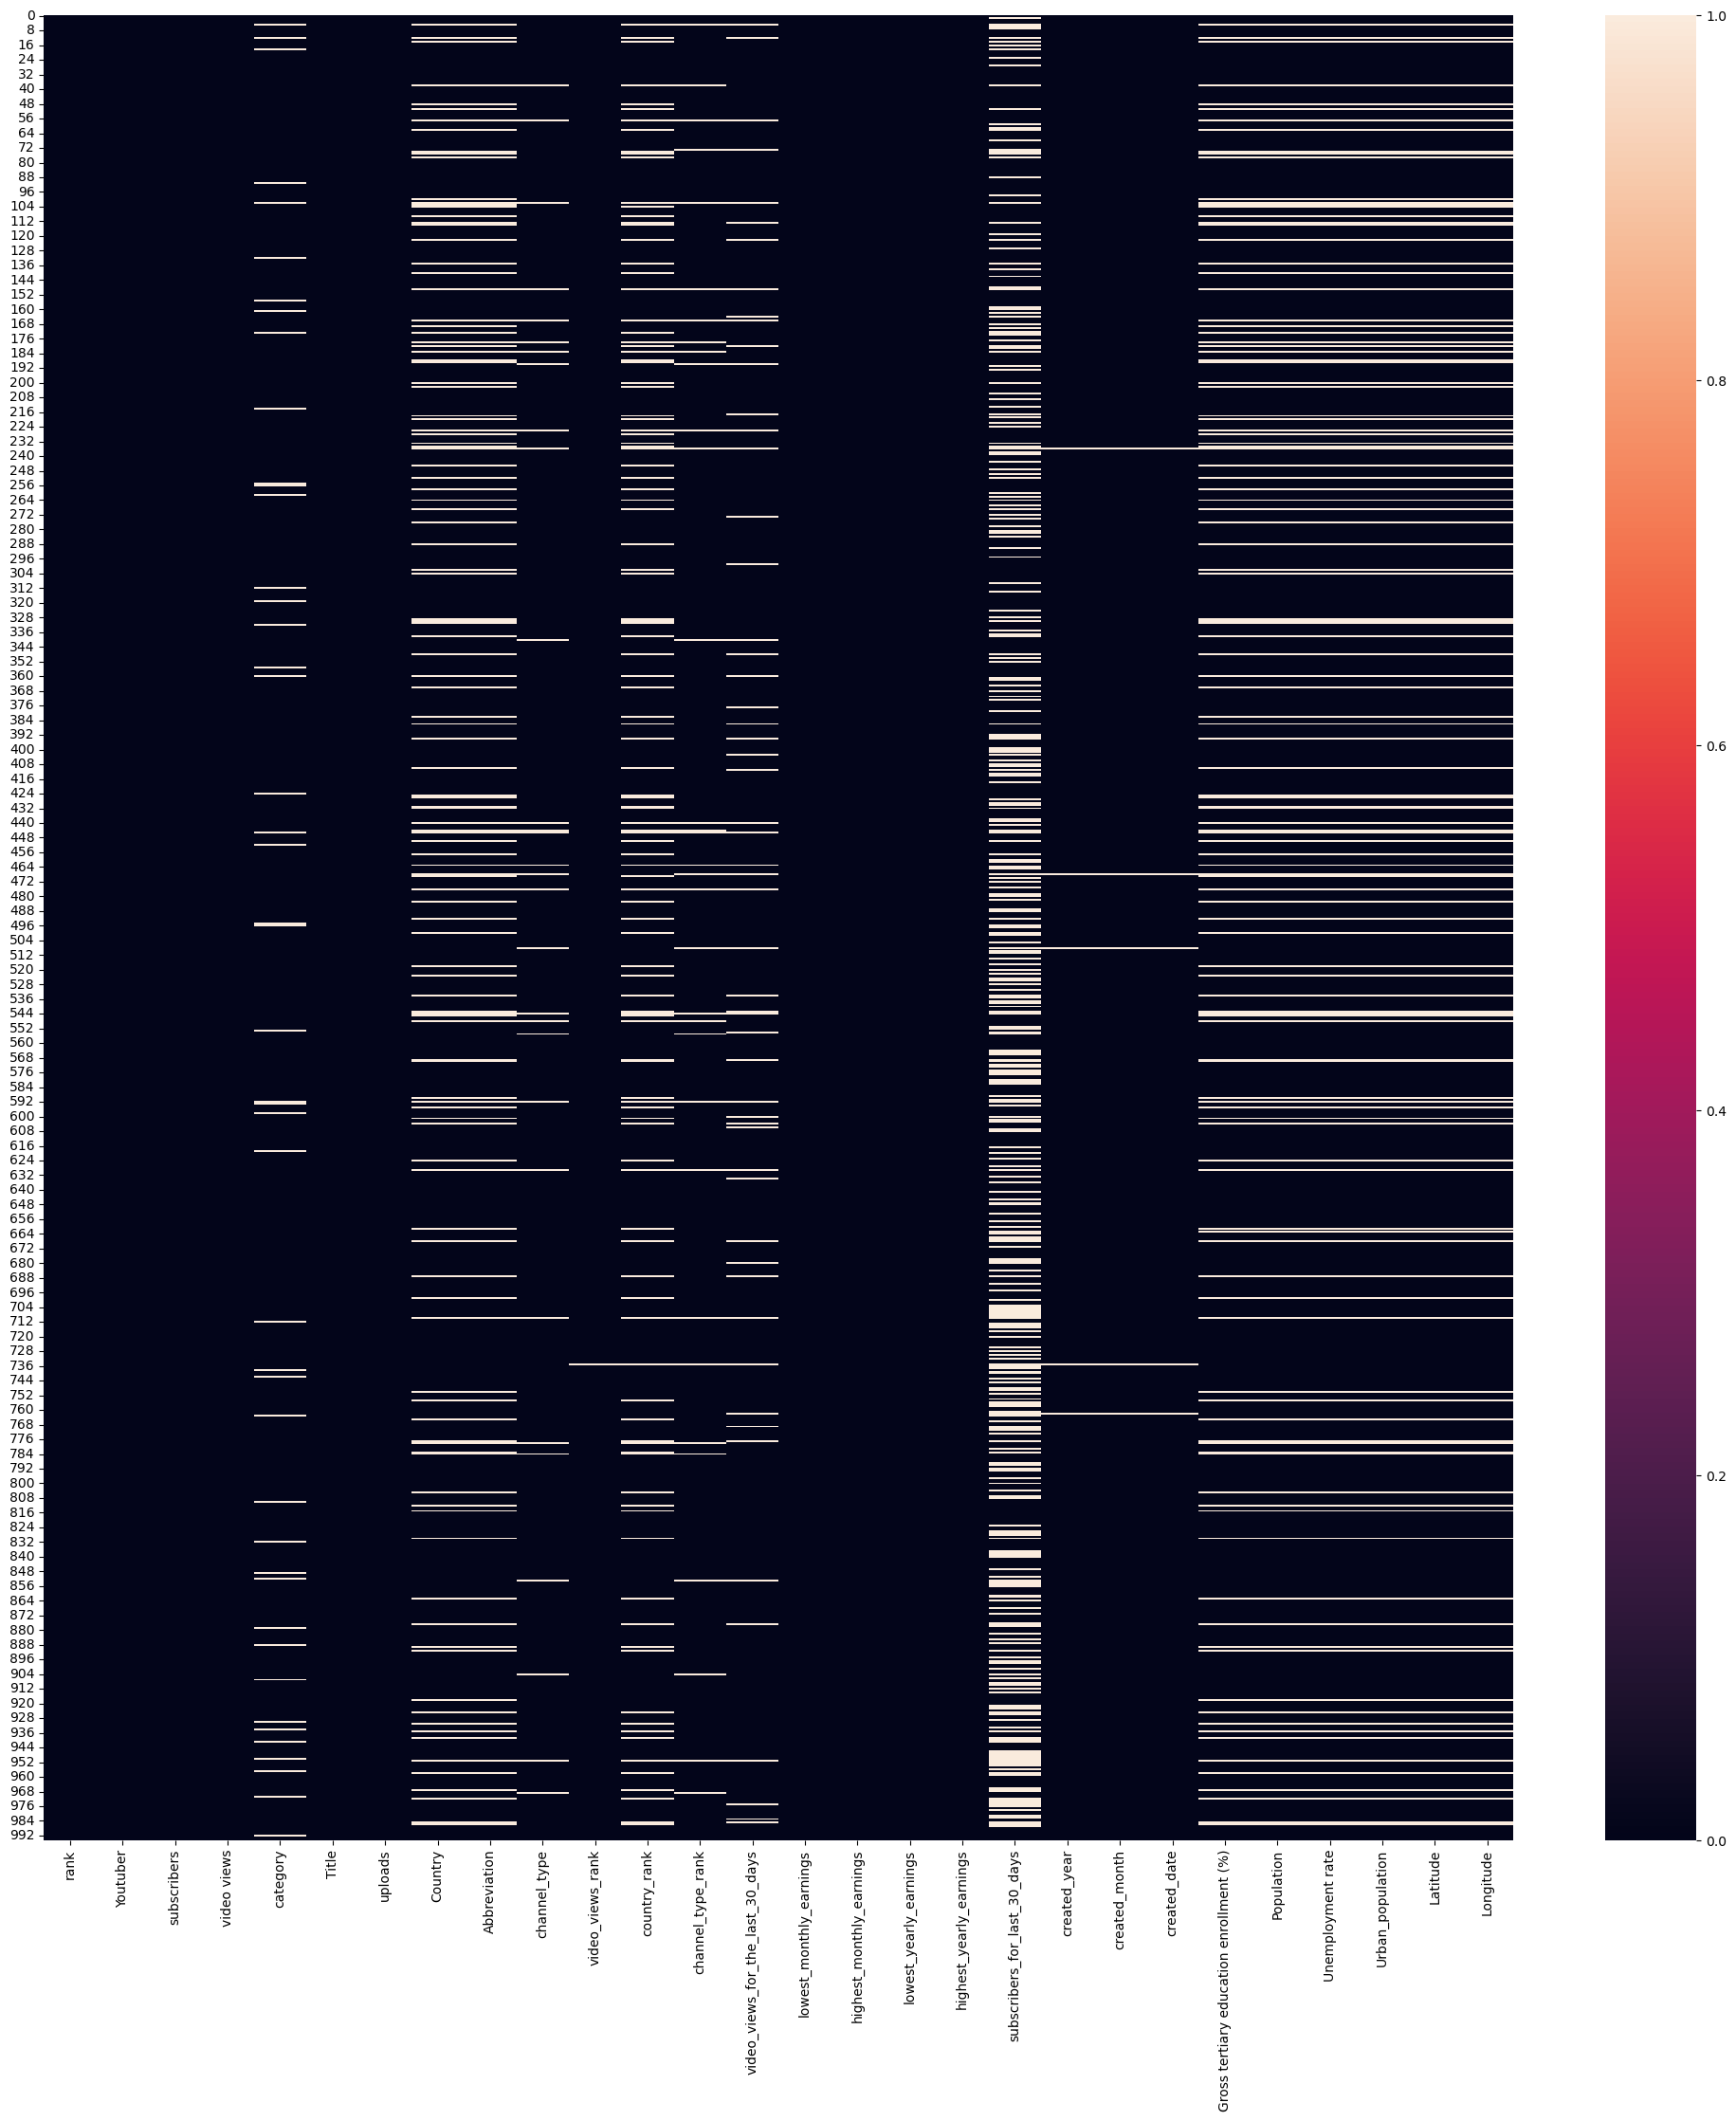

In [8]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [9]:
null_var = df.isnull().sum()/df.shape[0] *100
null_var

rank                                        0.000000
Youtuber                                    0.000000
subscribers                                 0.000000
video views                                 0.000000
category                                    4.623116
Title                                       0.000000
uploads                                     0.000000
Country                                    12.261307
Abbreviation                               12.261307
channel_type                                3.015075
video_views_rank                            0.100503
country_rank                               11.658291
channel_type_rank                           3.316583
video_views_for_the_last_30_days            5.628141
lowest_monthly_earnings                     0.000000
highest_monthly_earnings                    0.000000
lowest_yearly_earnings                      0.000000
highest_yearly_earnings                     0.000000
subscribers_for_last_30_days               33.

In [10]:
drop_columns  = null_var[null_var >20].keys()
drop_columns

Index(['subscribers_for_last_30_days'], dtype='object')

In [11]:
df2_drop_clm=df.drop(columns=drop_columns)
df2_drop_clm.shape

(995, 27)

<Axes: >

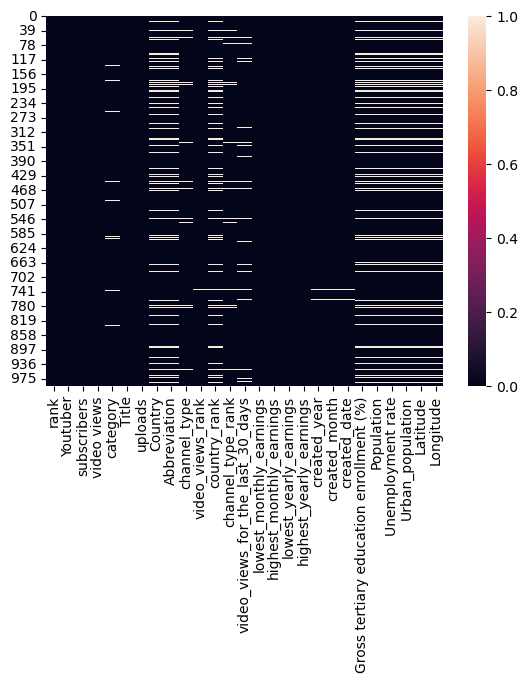

In [12]:
sns.heatmap(df2_drop_clm.isnull())

In [13]:
df3_drop_rows = df2_drop_clm.dropna()
df3_drop_rows.shape

(808, 27)

<Axes: >

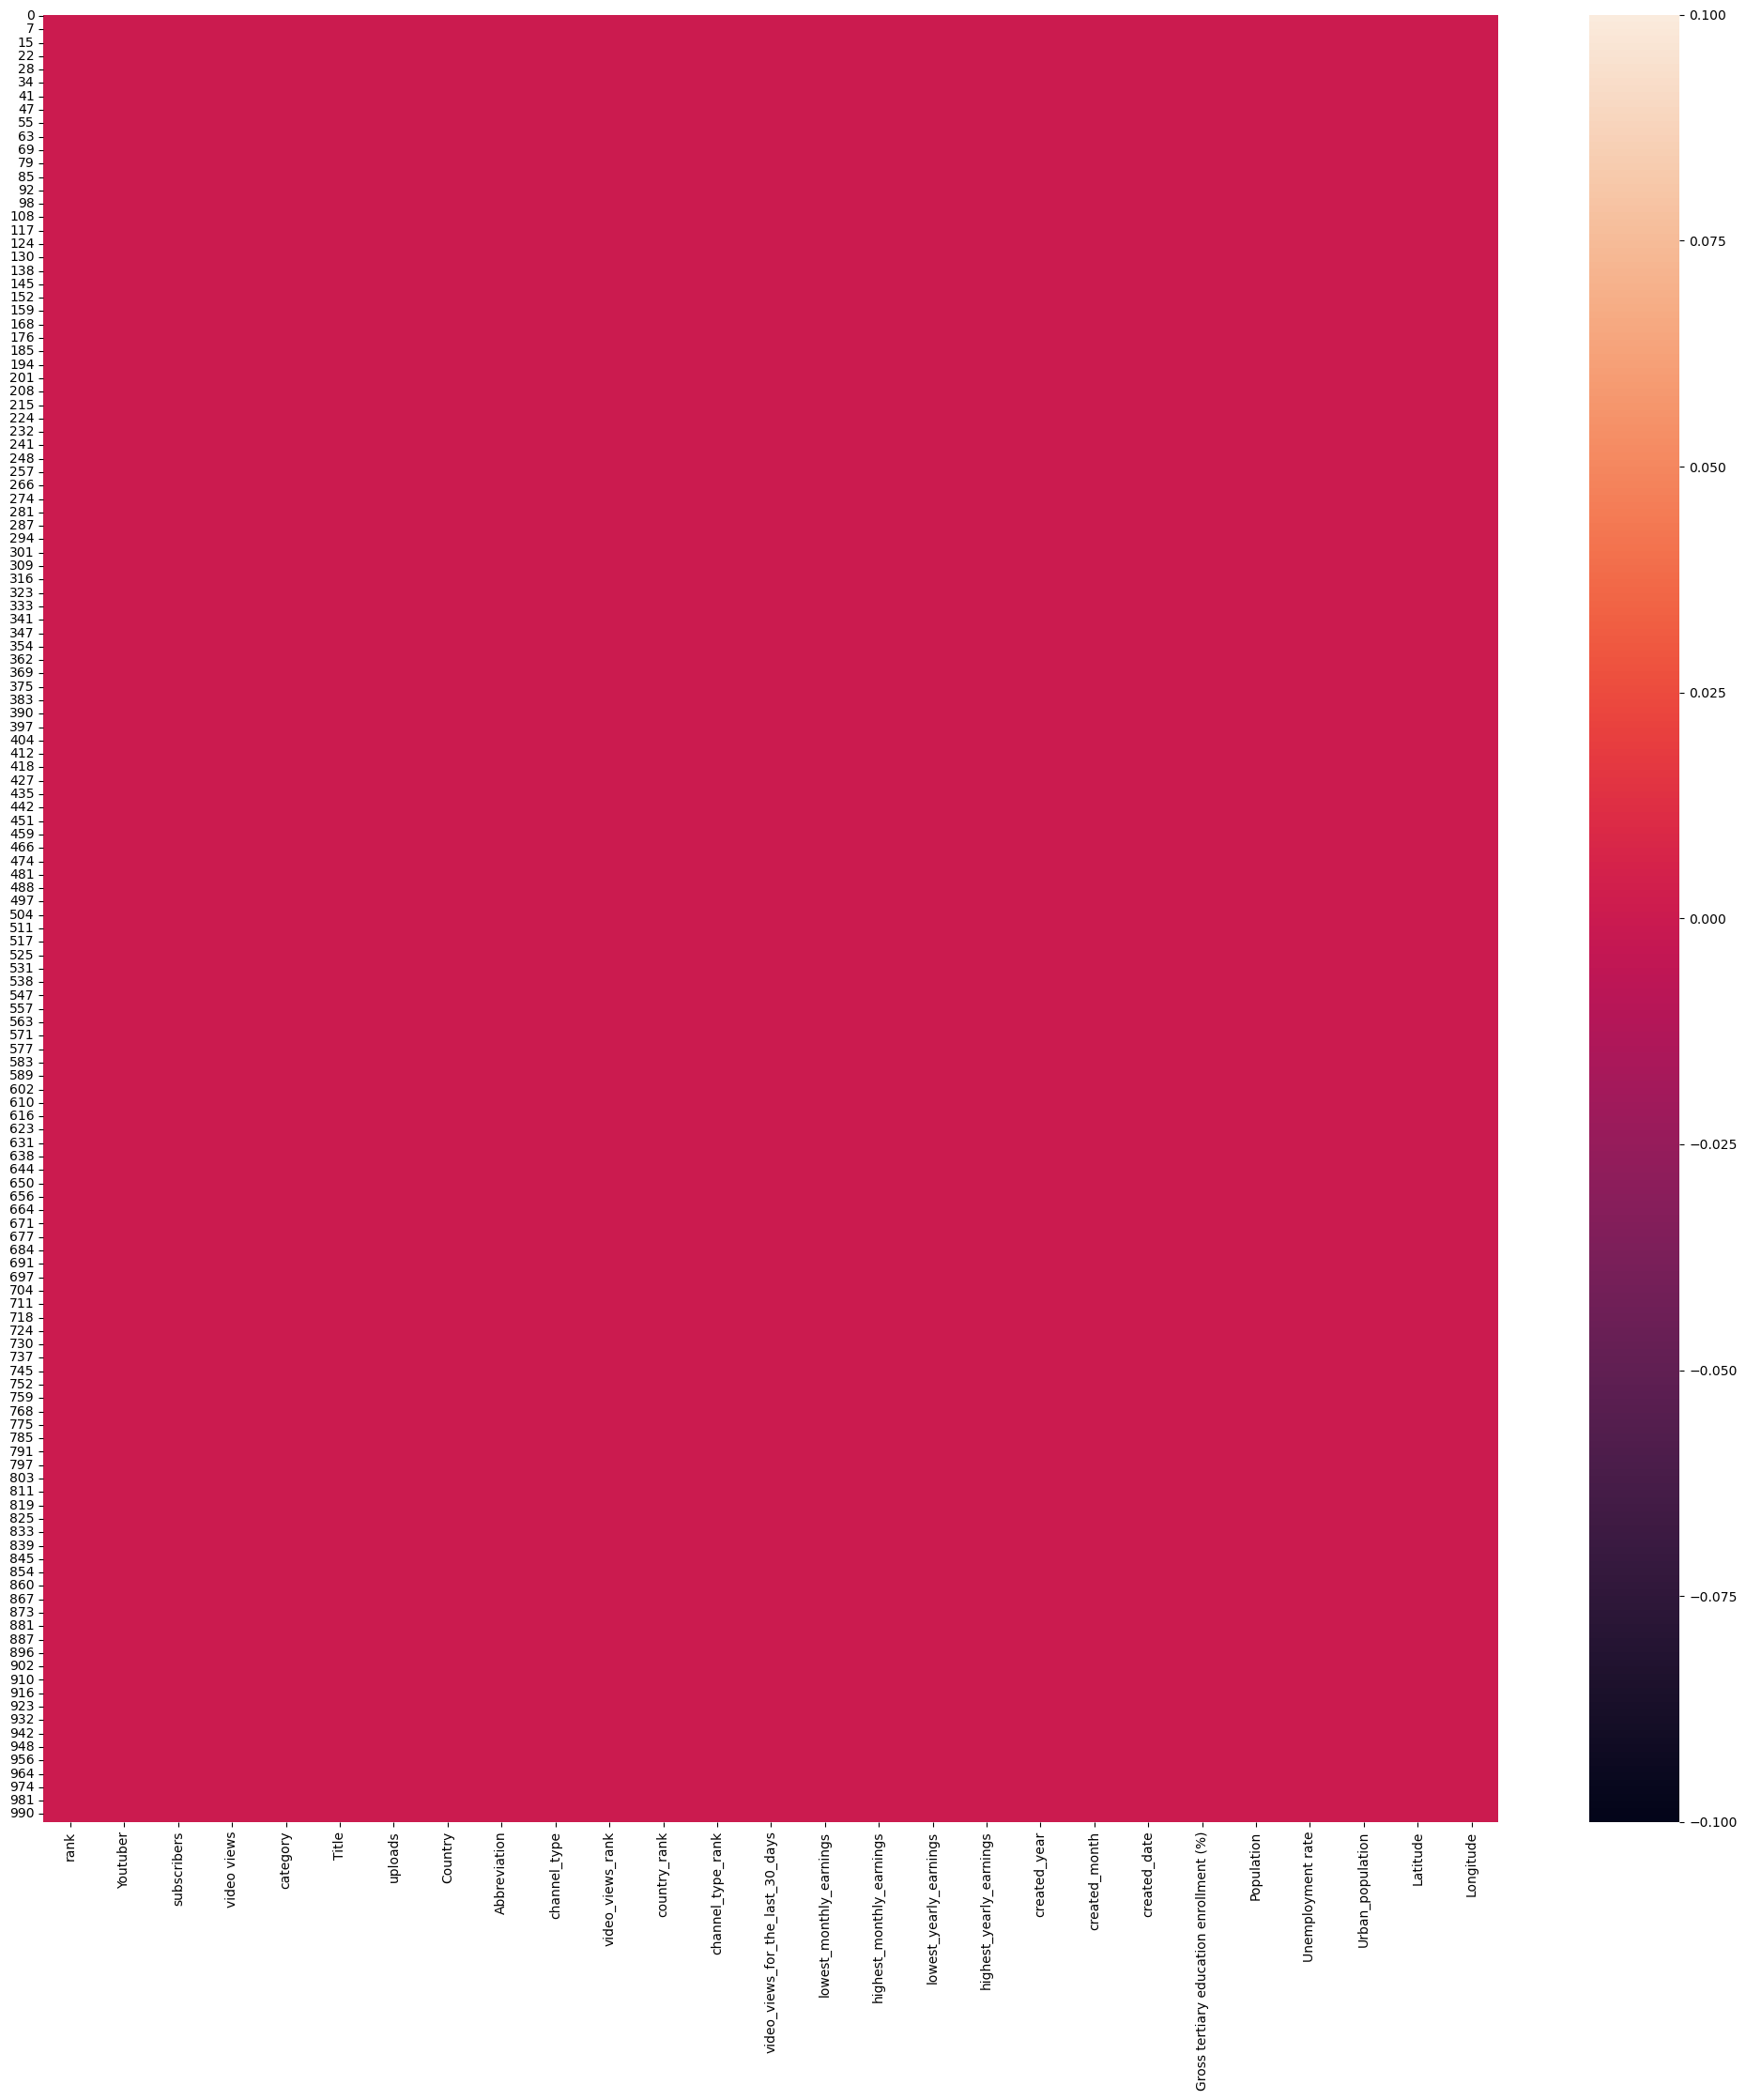

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df3_drop_rows.isnull())

In [15]:
df3_drop_rows.isnull().sum().sum()

0

In [16]:
df3_drop_rows.select_dtypes(include=['int64','float64']).columns

Index(['rank', 'subscribers', 'video views', 'uploads', 'video_views_rank',
       'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days',
       'lowest_monthly_earnings', 'highest_monthly_earnings',
       'lowest_yearly_earnings', 'highest_yearly_earnings', 'created_year',
       'created_date', 'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

C:\Users\dell\AppData\Local\Temp\ipykernel_23964\3226371863.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], bins=20)
C:\Users\dell\AppData\Local\Temp\ipykernel_23964\3226371863.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_drop_rows[var], bins=20)
C:\Users\dell\AppData\L

C:\Users\dell\AppData\Local\Temp\ipykernel_23964\3226371863.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], bins=20)
C:\Users\dell\AppData\Local\Temp\ipykernel_23964\3226371863.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_drop_rows[var], bins=20)
C:\Users\dell\AppData\L

C:\Users\dell\AppData\Local\Temp\ipykernel_23964\3226371863.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_drop_rows[var], bins=20)
C:\Users\dell\AppData\Local\Temp\ipykernel_23964\3226371863.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], bins=20)
C:\Users\dell\AppData\L

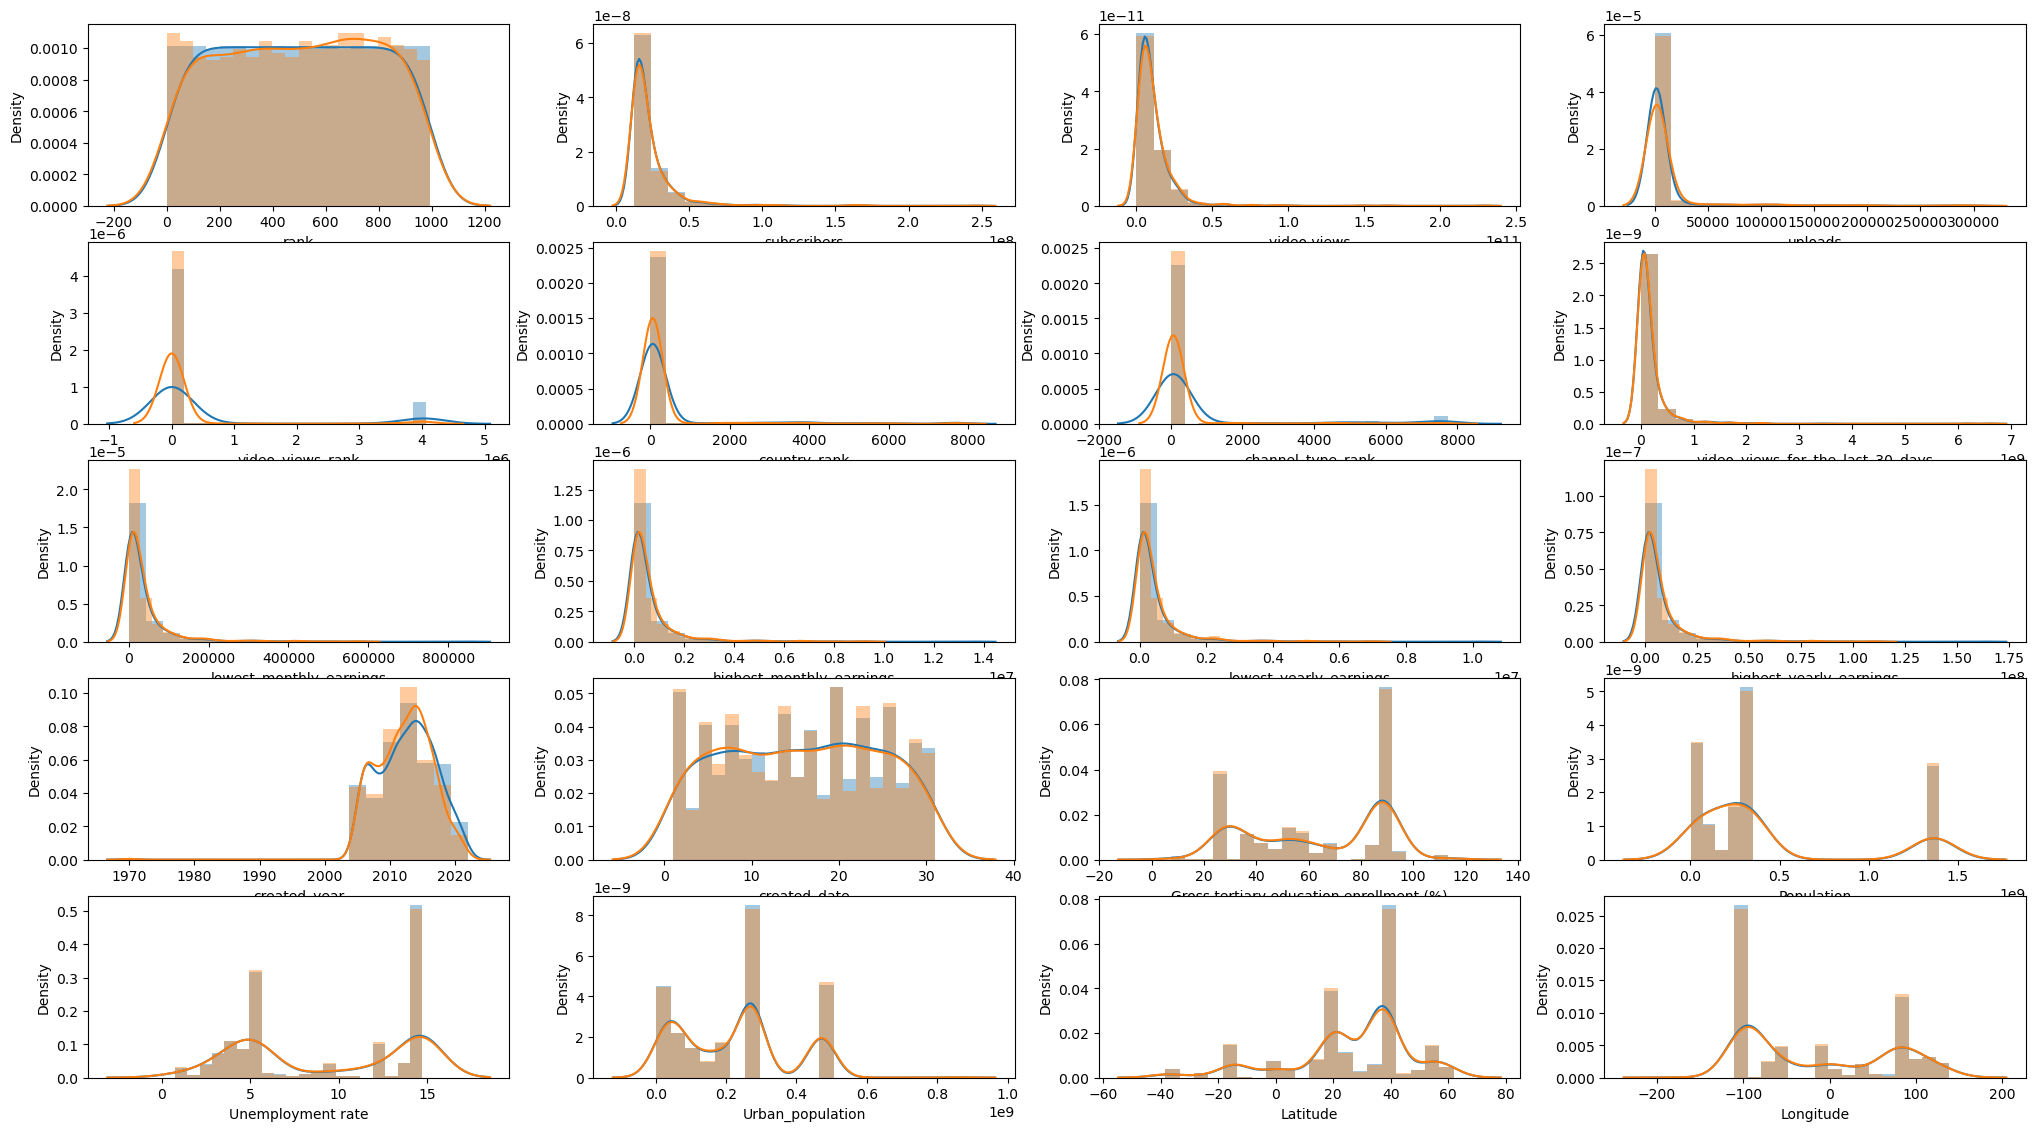

In [17]:
num_var=['rank', 'subscribers', 'video views', 'uploads', 'video_views_rank',
       'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days',
       'lowest_monthly_earnings', 'highest_monthly_earnings',
       'lowest_yearly_earnings', 'highest_yearly_earnings', 'created_year',
       'created_date', 'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']
plt.figure(figsize=(25,25))       
for i,var in enumerate(num_var):
    plt.subplot(9,4,i+1)
    sns.distplot(df[var], bins=20)
    sns.distplot(df3_drop_rows[var], bins=20)

In [18]:
remaining_col=df3_drop_rows.select_dtypes(include=['object']).columns

In [19]:
remaining_col

Index(['Youtuber', 'category', 'Title', 'Country', 'Abbreviation',
       'channel_type', 'created_month'],
      dtype='object')

In [20]:
remaining_colm=[]
for data in remaining_col:
    remaining_colm.append(data)
    
print(remaining_colm)

['Youtuber', 'category', 'Title', 'Country', 'Abbreviation', 'channel_type', 'created_month']


In [21]:
def percentage_change(var):
    return ((df[var].value_counts() - df3_drop_rows[var].value_counts()) / df[var].value_counts()) * 100
def cat_var_dist(var):
    return pd.concat([df[var].value_counts(), 
          df3_drop_rows[var].value_counts(),
          percentage_change(var)]

         , axis=1,
         keys=[var+'_org', var+'clean',var+'change in percent'])
    

In [22]:
#change after cleaning
for data in remaining_colm:
    print('row-',data)
    print(cat_var_dist(data))
    print()

row- Youtuber
                          Youtuber_org  Youtuberclean  \
T-Series                             1            1.0   
Hongyu ASMR ï¿½ï¿½                   1            NaN   
Sony LIV                             1            1.0   
T-Series Hamaar Bhojpuri             1            1.0   
Oyuncak Avï¿                         1            1.0   
...                                ...            ...   
Tekashi 6ix9ine                      1            1.0   
Tlnovelas                            1            1.0   
SMOL                                 1            NaN   
invictor                             1            1.0   
Make Joke Of                         1            1.0   

                          Youtuberchange in percent  
T-Series                                        0.0  
Hongyu ASMR ï¿½ï¿½                              NaN  
Sony LIV                                        0.0  
T-Series Hamaar Bhojpuri                        0.0  
Oyuncak Avï¿                   

# imputation by mean,median

In [25]:
df = pd.read_csv(r"Global YouTube Statistics.csv", encoding='windows-1254')

In [26]:
df.shape

(995, 28)